In [111]:
##import libraries
import warnings
warnings.filterwarnings("ignore")

import pandas                               as     pd
import numpy                                as     np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import figure


from scipy.stats import kurtosis, skew,boxcox,boxcox_normmax
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report
import statsmodels.api as sm

from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

## 1. Read the dataset 

In [2]:
df=pd.read_csv("ILPD.csv")

In [3]:
df.head()

,Age,Gender,Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,? A/G Ratio Albumin and Globulin Ratio,Selector field
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 2. Summarize important observations from the data set 

**a. Find out number of rows; no. & types of variables** 

In [4]:
print("no of rows :",df.shape[0])

print("no of columns :",df.shape[1])

no of rows : 583
no of columns : 11


In [5]:
df.dtypes

Age                                         int64
Gender                                     object
Total Bilirubin                           float64
DB Direct Bilirubin                       float64
Alkphos Alkaline Phosphotase                int64
Sgpt Alamine Aminotransferase               int64
Sgot Aspartate Aminotransferase             int64
TP Total Protiens                         float64
ALB Albumin                               float64
? A/G Ratio Albumin and Globulin Ratio    float64
Selector field                              int64
dtype: object

**b. Calculate five-point summary for numerical variables** 

In [6]:
df.describe()

,Age,Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,? A/G Ratio Albumin and Globulin Ratio,Selector field
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**c. Summarize observations for categorical variables – no. of categories, % observations in each category**

In [110]:
## here, only GENDER and Selector field  columns are  categorical but Selector field is target we check only gender.

In [8]:
df.describe(include="object")

,Gender
count,583
unique,2
top,Male
freq,441


In [9]:
(df['Gender'].value_counts()/df['Gender'].count())*100

Male      75.643225
Female    24.356775
Name: Gender, dtype: float64

## 3. Check for defects in the data. Perform necessary actions to ‘fix’ these defects 

**a. Do variables have missing/null values?** 

In [10]:
df.isnull().sum()

Age                                       0
Gender                                    0
Total Bilirubin                           0
DB Direct Bilirubin                       0
Alkphos Alkaline Phosphotase              0
Sgpt Alamine Aminotransferase             0
Sgot Aspartate Aminotransferase           0
TP Total Protiens                         0
ALB Albumin                               0
? A/G Ratio Albumin and Globulin Ratio    4
Selector field                            0
dtype: int64

***here only 4 null values in this dataset.so,we remove directly***

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

Age                                       0
Gender                                    0
Total Bilirubin                           0
DB Direct Bilirubin                       0
Alkphos Alkaline Phosphotase              0
Sgpt Alamine Aminotransferase             0
Sgot Aspartate Aminotransferase           0
TP Total Protiens                         0
ALB Albumin                               0
? A/G Ratio Albumin and Globulin Ratio    0
Selector field                            0
dtype: int64

***b. Do variables have outliers***

In [13]:
a=df.describe(exclude="object").columns

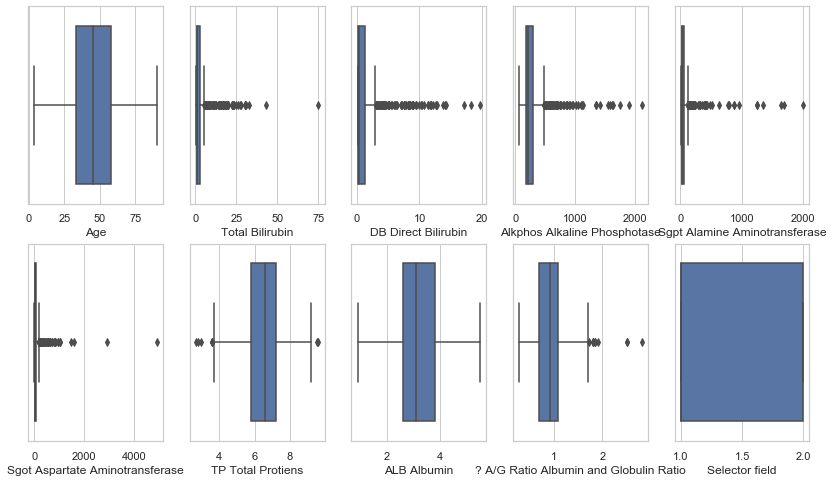

In [14]:
fig,ax  = plt.subplots(2,5,figsize = (14,8))

for i,ax in zip(a,ax.flatten()):
    sns.boxplot(df[i], ax = ax)


**here,5 columns have outliers.we have very low value of data,we remove the outliers it will affect the accuracy.**



## check data imbalance

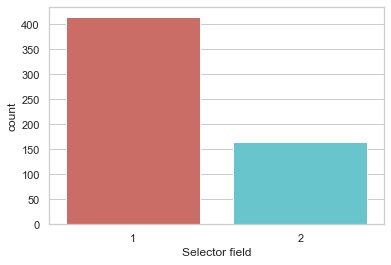

In [15]:
sns.countplot(x='Selector field',data=df, palette='hls')
plt.show()

In [16]:
df["Selector field"].value_counts()

1    414
2    165
Name: Selector field, dtype: int64

In [17]:
lp = df[df['Selector field'] == 1]
non_lp = df[df['Selector field'] == 2]

In [18]:
df_upsampled = resample(non_lp,
                          replace=True, 
                          n_samples=len(lp), 
                          random_state=27) 

In [19]:
df = pd.concat([lp, df_upsampled])

In [20]:
df['Selector field'].value_counts()

2    414
1    414
Name: Selector field, dtype: int64

**now the data balanced.**

## 4. Summarize relationships among variables 

**a. Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target**

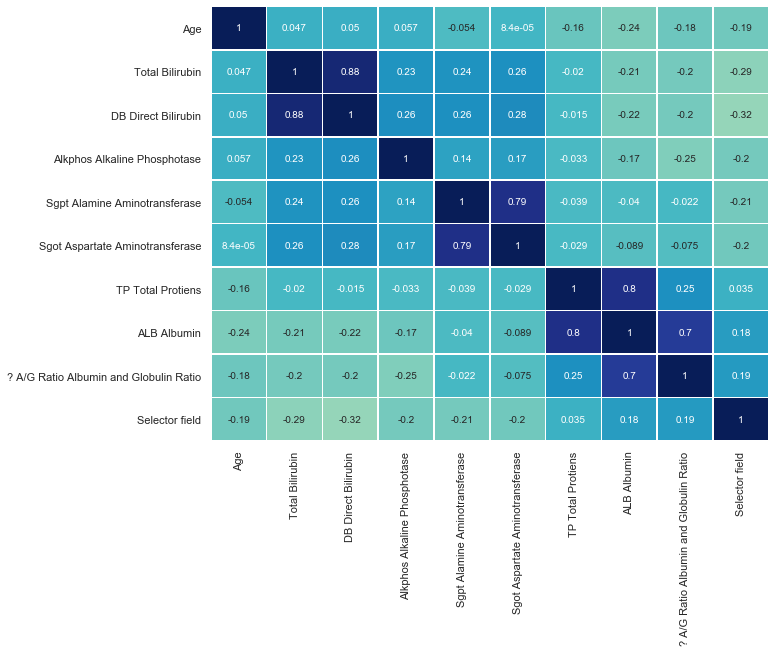

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

**from heat map none of the columns have correlation it will affect the accuracy of base model**

**TB&DB feautures have autocorrelation.**

##  Do you want to exclude some variables from the model based on this analysis? 

**yes, the autocorrelation feauture TB has to be remove.**

In [22]:
df.drop("Total Bilirubin", axis = 1, inplace = True)

**b. Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable**

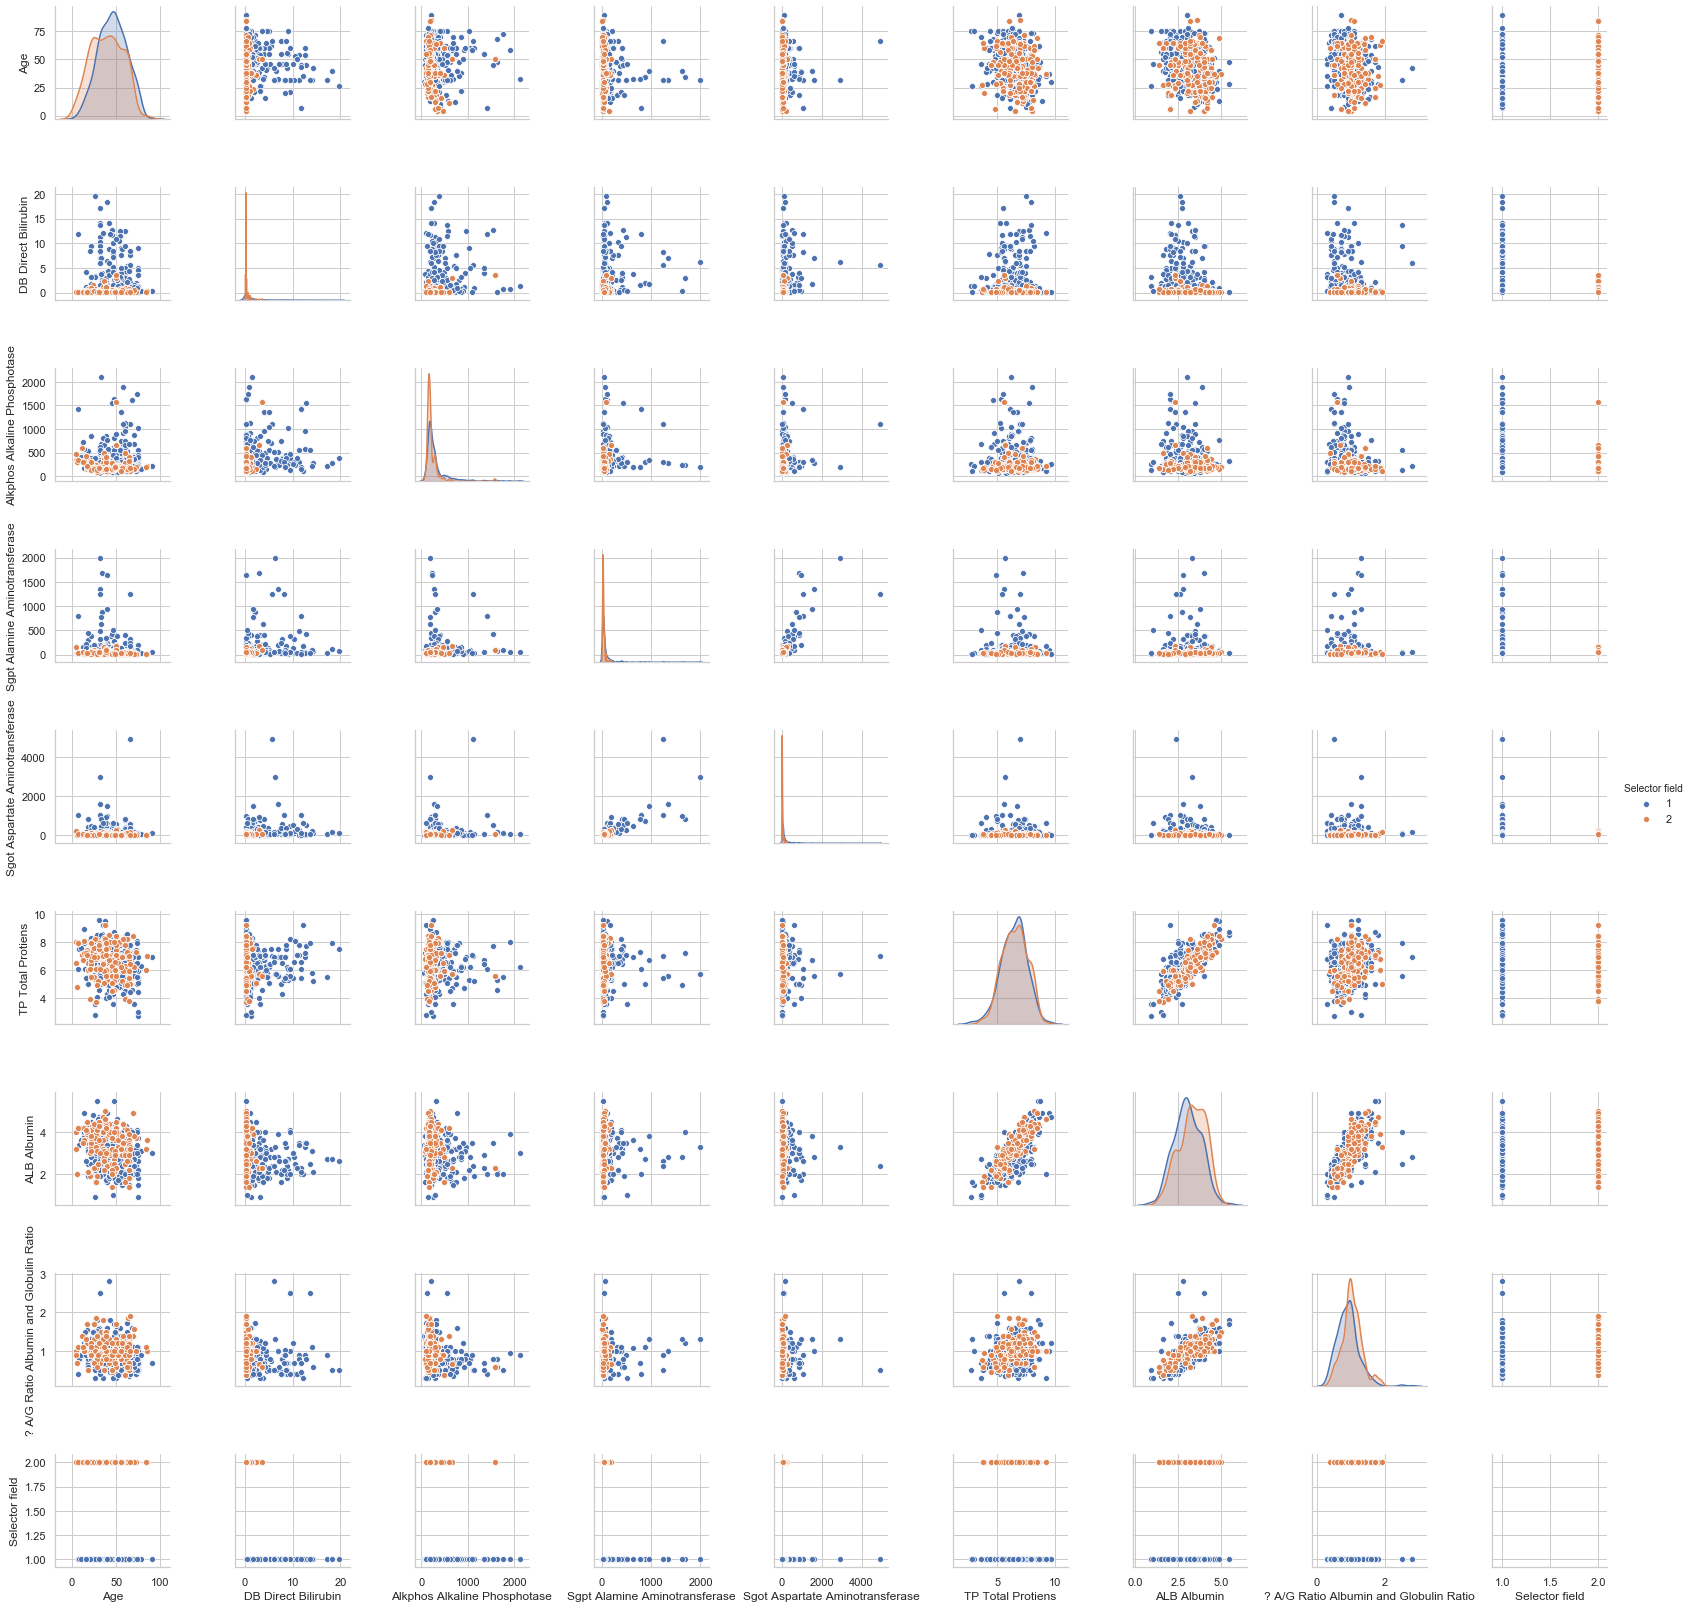

In [23]:
sns.pairplot(df,hue='Selector field')

**using labelencoder for data preprocessing**

In [24]:
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [25]:
df.head()

,Age,Gender,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,? A/G Ratio Albumin and Globulin Ratio,Selector field
0,58,0,0,71,6,8,34,21,31,0
1,55,1,45,233,54,85,41,20,23,0
2,55,1,36,201,50,58,36,21,30,0
3,52,1,3,66,4,10,34,22,37,0
4,64,1,19,79,17,49,39,12,4,0


## 5. Split dataset into train and test (70:30) 

In [26]:
X = df.drop('Selector field', axis=1)
y = df['Selector field']

In [27]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(579, 9)
(249, 9)
(249,)


## 6. Fit a base model and explain the reason of selecting that model. Please write your key observations. 

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
pred = logmodel.predict(X_test)
pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1], dtype=int64)

**a. What is the overall Accuracy? Please comment on whether it is good or not**

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.6947791164658634


**the overall accuracy is 69% its not good for the model.**

**b. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.** 

In [33]:
print(classification_report(y_test, pred) )

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       121
           1       0.68      0.77      0.72       128

    accuracy                           0.69       249
   macro avg       0.70      0.69      0.69       249
weighted avg       0.70      0.69      0.69       249



**c. Which variables are significant?** 

In [34]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.568684
         Iterations 7
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.180     
Dependent Variable:        Selector field          AIC:                     959.7400  
Date:                      2020-02-11 12:31        BIC:                     1002.2111 
No. Observations:          828                     Log-Likelihood:          -470.87   
Df Model:                  8                       LL-Null:                 -573.93   
Df Residuals:              819                     LLR p-value:             3.2898e-40
Converged:                 1.0000                  Scale:                   1.0000    
No. Iterations:            7.0000                                                     
--------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z    

**signifiacance value is measured by p-value.**

**we take 95% of significance, the p-value which are less than 0.05 are good significanct feautures.**

**but,here all variables are greater than 0.05.**

**only one feauture has <0.05 [DB Direct Bilirubin]**

**so, we conclude DB Direct Bilirubin is the most significant features in data set**

## d. What is Cohen’s Kappa Value and what inference do you make from the model 

In [35]:
print("Cohen’s Kappa Value :",cohen_kappa_score(y_test, pred))

Cohen’s Kappa Value : 0.3865802269043761


**the Cohen’s Kappa Value says the data set is fair agreement its not good.**

## 7. How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 MARKS) 

**more ways to improve accuracy like check the models iteratively and check data imbalance,check feauture selection.**

### feauture selection

In [38]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)


In [39]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [40]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [45]:
featureScores

,Specs,Score
0,Age,226.399532
1,Gender,1.177706
2,DB Direct Bilirubin,3279.466813
3,Alkphos Alkaline Phosphotase,2192.080853
4,Sgpt Alamine Aminotransferase,2637.903115
5,Sgot Aspartate Aminotransferase,3912.884022
6,TP Total Protiens,3.531514
7,ALB Albumin,83.619786
8,? A/G Ratio Albumin and Globulin Ratio,236.853526


**from above table we remove gender,TP,ALB,AGE for improve model accuracy.**

In [ ]:
X = df.drop('Selector field', axis=1)
y = df['Selector field']

In [46]:
df.drop(["Gender","TP Total Protiens","ALB Albumin"],axis=1,inplace=True)

In [48]:
X = df.drop('Selector field', axis=1)
y = df['Selector field']

In [49]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(579, 6)
(249, 6)
(249,)


In [56]:
LR = LogisticRegression()
LR.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pred = LR.predict(X_test)
pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.714859437751004


In [60]:
print(classification_report(y_test, pred) )

              precision    recall  f1-score   support

           0       0.77      0.60      0.67       121
           1       0.68      0.83      0.75       128

    accuracy                           0.71       249
   macro avg       0.72      0.71      0.71       249
weighted avg       0.72      0.71      0.71       249



In [61]:
## now the accuracy improved

## define various models

**Bagged Logistic Regression**

In [62]:
LR_Bagged = BaggingClassifier(base_estimator=LR,random_state=0)

In [67]:
KF1 = KFold(n_splits=5,shuffle=True,random_state=0)
KF1_params ={'n_estimators':np.arange(1,10)}
LGS = RandomizedSearchCV(LR_Bagged,KF1_params,cv=KF1,scoring='roc_auc')
LGS.fit(X,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                                 class_weight=None,
                                                                                 dual=False,
                                                                                 fit_intercept=True,
                                                                                 intercept_scaling=1,
                                                                                 l1_ratio=None,
                                                                                 max_iter=100,
                                                                                 multi_class='auto',
                                                                                 n_jobs=None,
                       

In [68]:
LGS_bestparams = LGS.best_params_
LGS_n_estimators = LGS_bestparams['n_estimators']

In [69]:
After_KFold_LR_Bagged = BaggingClassifier(base_estimator=LR,n_estimators=LGS_n_estimators,random_state=0)

**ADA Boosted Logistic Regression**

In [70]:
LR_Boost = AdaBoostClassifier(base_estimator=LR,n_estimators=50)

**Naive-Bayes**

In [71]:
NB = GaussianNB()

#ADA Boosted
NB_Boost = AdaBoostClassifier(base_estimator=NB,n_estimators=50)

**Decision Tree**

In [72]:
#DT - criterion='gini'
DT_model_Gini = DecisionTreeClassifier(random_state=0) #Full grown tree for shown the bias and variance
DT_model_Gini_Regularized = DecisionTreeClassifier(max_depth=4,random_state=0) #DT_Regularized

#DT - criterion='entropy'
DT_model_entropy = DecisionTreeClassifier(criterion='entropy',random_state=0) #Full grown tree for shown the bias and variance
DT_model_entropy_Regularized = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0) #DT_Regularized

#Bagged
DT_Bagged = BaggingClassifier(n_estimators=10,random_state=0) #Bagged

#Ada Boosted
DT_ADABoosted = AdaBoostClassifier(n_estimators=50)

#Gradient Boosted
GB_Boost = GradientBoostingClassifier(n_estimators=100)

**K - Nearest Neighbour**

In [74]:
KNN = KNeighborsClassifier() 
KNN_1 = KNeighborsClassifier(n_neighbors=5,weights='uniform') #Default

In [75]:
params ={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS = GridSearchCV(KNN,params,cv=5,scoring='recall')
GS.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [76]:
bestparams = GS.best_params_ 
KNN_n_neighbors = bestparams['n_neighbors']
KNN_weights = bestparams['weights']
KNN_2 = KNeighborsClassifier(n_neighbors=KNN_n_neighbors,weights=KNN_weights)

In [77]:
#Bagged-KNN model
KNN_Bagged = BaggingClassifier(base_estimator=KNN_2) 

In [78]:
KNN_Bagged_params ={'n_estimators':np.arange(1,50)}
GS1 =GridSearchCV(KNN_Bagged,KNN_Bagged_params,cv=5,scoring='recall')
GS1.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=37,
                                                                             p=2,
                                                                             weights='distance'),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                     

In [79]:
GS1_bestparams = GS1.best_params_
KNN_Bagged_n_estimators = GS1_bestparams['n_estimators']

In [80]:
KNN_Bagged_with_n_estimators = BaggingClassifier(base_estimator=KNN_2,n_estimators=KNN_Bagged_n_estimators,random_state=0) 

In [81]:
#getting the diff n_estimators, we using kfold for getting the same n_estimators
KF = KFold(n_splits=5,shuffle=True,random_state=0)
KF_params ={'n_estimators':np.arange(1,50)}
GS2 = GridSearchCV(KNN_Bagged,KF_params,cv=KF,scoring='recall')
GS2.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=37,
                                                                             p=2,
                                                                             weights='distance'),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                      

In [82]:
GS2_bestparams = GS2.best_params_
KF_n_estimators = GS2_bestparams['n_estimators']

In [83]:
After_KF_KNN_Bagged = BaggingClassifier(base_estimator=KNN_2,n_estimators=KF_n_estimators,random_state=0) 

**Random Forest**

In [84]:
RF_gini = RandomForestClassifier(n_estimators=51,criterion='gini',random_state=0 )
RF_entropy = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )

#ADA Boosted
RF_gini_ADABoosted = AdaBoostClassifier(base_estimator=RF_gini,n_estimators=50)
RF_entropy_ADABoosted = AdaBoostClassifier(base_estimator=RF_entropy,n_estimators=50)

**model comparision**

In [85]:
models = []
#Logistic Regression
models.append(('Logistic Regression', LR))
models.append(('Bagged Logistic Regression', LR_Bagged))
models.append(('After KFold Logistic Regression',After_KFold_LR_Bagged))
models.append(('ADA Boosted Logistic Regression', LR_Boost))
#Naive Bayes
models.append(('Naive-Bayes',NB))
models.append(('ADA Boosted Naive-Bayes',NB_Boost))
#Decision Tree
models.append(('Decision Tree - Gini',DT_model_Gini))
models.append(('Decision Tree - Gini Regularized',DT_model_Gini_Regularized))
models.append(('Decision Tree - Entropy',DT_model_entropy))
models.append(('Decision Tree - Entropy Regularized',DT_model_entropy_Regularized))
models.append(('Bagged Decision Tree',DT_Bagged))
models.append(('ADA Boosted Decision Tree',DT_ADABoosted))
models.append(('Gradient Boosted Decision Tree',GB_Boost))
#K-Nearest Neighbor
models.append(('KNN',KNN))
models.append(('KNN (Default)',KNN_1))
models.append(('KNN with best n-neighbor and weights',KNN_2))
models.append(('Bagged KNN',KNN_Bagged))
models.append(('After KFold Bagged KNN',After_KF_KNN_Bagged))
#Random Forest
models.append(('RF - Gini',RF_gini))
models.append(('RF - Entropy',RF_entropy))
models.append(('ADA Boosted RF - Gini',RF_gini_ADABoosted))
models.append(('ADA Boosted RF - Entropy',RF_entropy_ADABoosted))

In [97]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
Result = pd.DataFrame(columns = ['Algorithm' , 'Accuracy', 'Avg Bias','Bias Error',
                                 'Avg Variance'])
for name, model in models:
    
    k=0
    recall=np.zeros((2,5))
    prec=np.zeros((2,5))
    fscore=np.zeros((2,5))
    
    algorithm = name
    X = X
    y = y
    for train,test in kf.split(X,y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=y.iloc[train],y.iloc[test]
        model.fit(Xtrain,Ytrain)
        pred_y=model.predict(Xtest)
        confusionMatrix=metrics.confusion_matrix(Ytest,pred_y)
        for i in np.arange(0,2):
            recall[i,k]=confusionMatrix[i,i]/confusionMatrix[i,:].sum()
        for i in np.arange(0,2):
            prec[i,k]=confusionMatrix[i,i]/confusionMatrix[:,i].sum()
        k=k+1
    for row in np.arange(0,2):
        for col in np.arange(0,5):
            fscore[row,col]=2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    
 
    accuracy = metrics.accuracy_score(Ytest,pred_y)
    accuracy_value = round(accuracy*100,2)
    
    avg_f1=(np.mean(fscore[0,:])+np.mean(fscore[1,:]))/2
    avg_var=(np.var(fscore[0,:],ddof=1)+ np.var(fscore[1,:],ddof=1))/2
    
    Result = Result.append(pd.Series([algorithm, accuracy_value,avg_f1, 1-avg_f1,avg_var, ], 
                                     index=Result.columns ), ignore_index=True)


## 8. Summarize as follows 

## 1. Summarize the overall fit of the model and list down the measures to prove that it is a good model 

In [99]:
Result

,Algorithm,Accuracy,Avg Bias,Bias Error,Avg Variance
0,Logistic Regression,67.88,0.704963,0.295037,0.000774
1,Bagged Logistic Regression,67.27,0.708544,0.291456,0.000843
2,After KFold Logistic Regression,69.09,0.713460,0.286540,0.000629
3,ADA Boosted Logistic Regression,67.27,0.703650,0.296350,0.001104
4,Naive-Bayes,66.06,0.684500,0.315500,0.001300
5,ADA Boosted Naive-Bayes,59.39,NaN,NaN,NaN
6,Decision Tree - Gini,81.21,0.838790,0.161210,0.000838
7,Decision Tree - Gini Regularized,67.88,0.728541,0.271459,0.001670
8,Decision Tree - Entropy,83.03,0.830020,0.169980,0.001242
9,Decision Tree - Entropy Regularized,65.45,0.696270,0.303730,0.001664


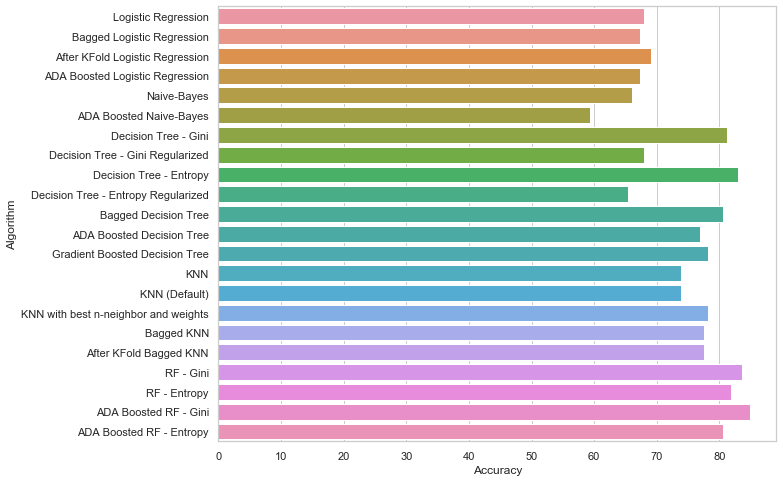

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x="Accuracy", y="Algorithm", data=Result)

In [102]:
Result.sort_values(['Accuracy'], ascending=False)

,Algorithm,Accuracy,Avg Bias,Bias Error,Avg Variance
20,ADA Boosted RF - Gini,84.85,0.861175,0.138825,0.000279
18,RF - Gini,83.64,0.853893,0.146107,0.000328
8,Decision Tree - Entropy,83.03,0.830020,0.169980,0.001242
19,RF - Entropy,81.82,0.840525,0.159475,0.000577
6,Decision Tree - Gini,81.21,0.838790,0.161210,0.000838
21,ADA Boosted RF - Entropy,80.61,0.834412,0.165588,0.000426
10,Bagged Decision Tree,80.61,0.843521,0.156479,0.001014
12,Gradient Boosted Decision Tree,78.18,0.790470,0.209530,0.000916
15,KNN with best n-neighbor and weights,78.18,0.771471,0.228529,0.001186
17,After KFold Bagged KNN,77.58,0.775898,0.224102,0.001037


## 2. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain

**From all the above model, Random Forest gave the high accuracy and less bias error. But We need to check the both False Positive and False Negative. Since our business problem is depends the FP and FN. The Cost of False Negative will be high. so the solution should overcome this cost.** 

**Final Prediction Model - Random Forest**

In [108]:
X = X
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = RandomForestClassifier()
params = {'criterion' : ['gini', 'entropy'], 'n_estimators' : np.arange(1,300),
            'min_samples_split' : [0.01, 0.001],
           'max_depth' : np.arange(1,50), 'max_features' : ['auto', 'sqrt', 'log2'],
          }
rsearch = RandomizedSearchCV(model, params, cv=5, n_iter=10, n_jobs=5, scoring='accuracy', verbose=True)
rsearch.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  41 out of  50 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

** due to time consumption using randomsearch instead of grid search**

In [109]:
y_pred = rsearch.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test,y_pred) * 100))
#Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 100.0 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       119

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



# Accuracy is 100% as well as the recall score,f1score,precision all get 100.
# now we conclude its the best model.

## 3. What changes from the base model had the most effect on model performance? 

**feauture selction helps a lot to improve accuracy from base model**

**hyperparameter tunning also help me out to improve accuracy**

**resampling techniques**


## 4. What are the key risks to your results and interpretation

**outliers- need a domain knowledge for outliers treatment**

**data imbalance- data is imbalanced it affect the accuracy**

**data- insufficientdata/baddata is affecting the model accuracy**

**feautures- most of the feautures are not correlated with target variable**